In [60]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, export_text
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn import tree

In [3]:
california_housing = fetch_california_housing(as_frame=True)
california_housing.frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [165]:
#Линейной регресси
X_train, X_test, y_train, y_test = train_test_split(california_housing.data, california_housing.target, test_size = 0.2, random_state=42)
lr = LinearRegression()
model_lr = lr.fit(X_train, y_train)
print(f'Метрика у линейной регрессии = {lr.score(X_test, y_test)}')

Метрика у линейной регрессии = 0.575787706032451


In [171]:
#Дерево решений с глубиной 3
clf = DecisionTreeRegressor(max_depth=3)
model_clf = clf.fit(X_train, y_train)
text_representation = export_text(model_clf, feature_names=california_housing.feature_names)
print(text_representation)

|--- MedInc <= 5.09
|   |--- MedInc <= 3.07
|   |   |--- AveRooms <= 4.31
|   |   |   |--- value: [1.63]
|   |   |--- AveRooms >  4.31
|   |   |   |--- value: [1.17]
|   |--- MedInc >  3.07
|   |   |--- AveOccup <= 2.42
|   |   |   |--- value: [2.74]
|   |   |--- AveOccup >  2.42
|   |   |   |--- value: [1.87]
|--- MedInc >  5.09
|   |--- MedInc <= 6.89
|   |   |--- AveOccup <= 2.67
|   |   |   |--- value: [3.52]
|   |   |--- AveOccup >  2.67
|   |   |   |--- value: [2.64]
|   |--- MedInc >  6.89
|   |   |--- MedInc <= 7.82
|   |   |   |--- value: [3.77]
|   |   |--- MedInc >  7.82
|   |   |   |--- value: [4.58]



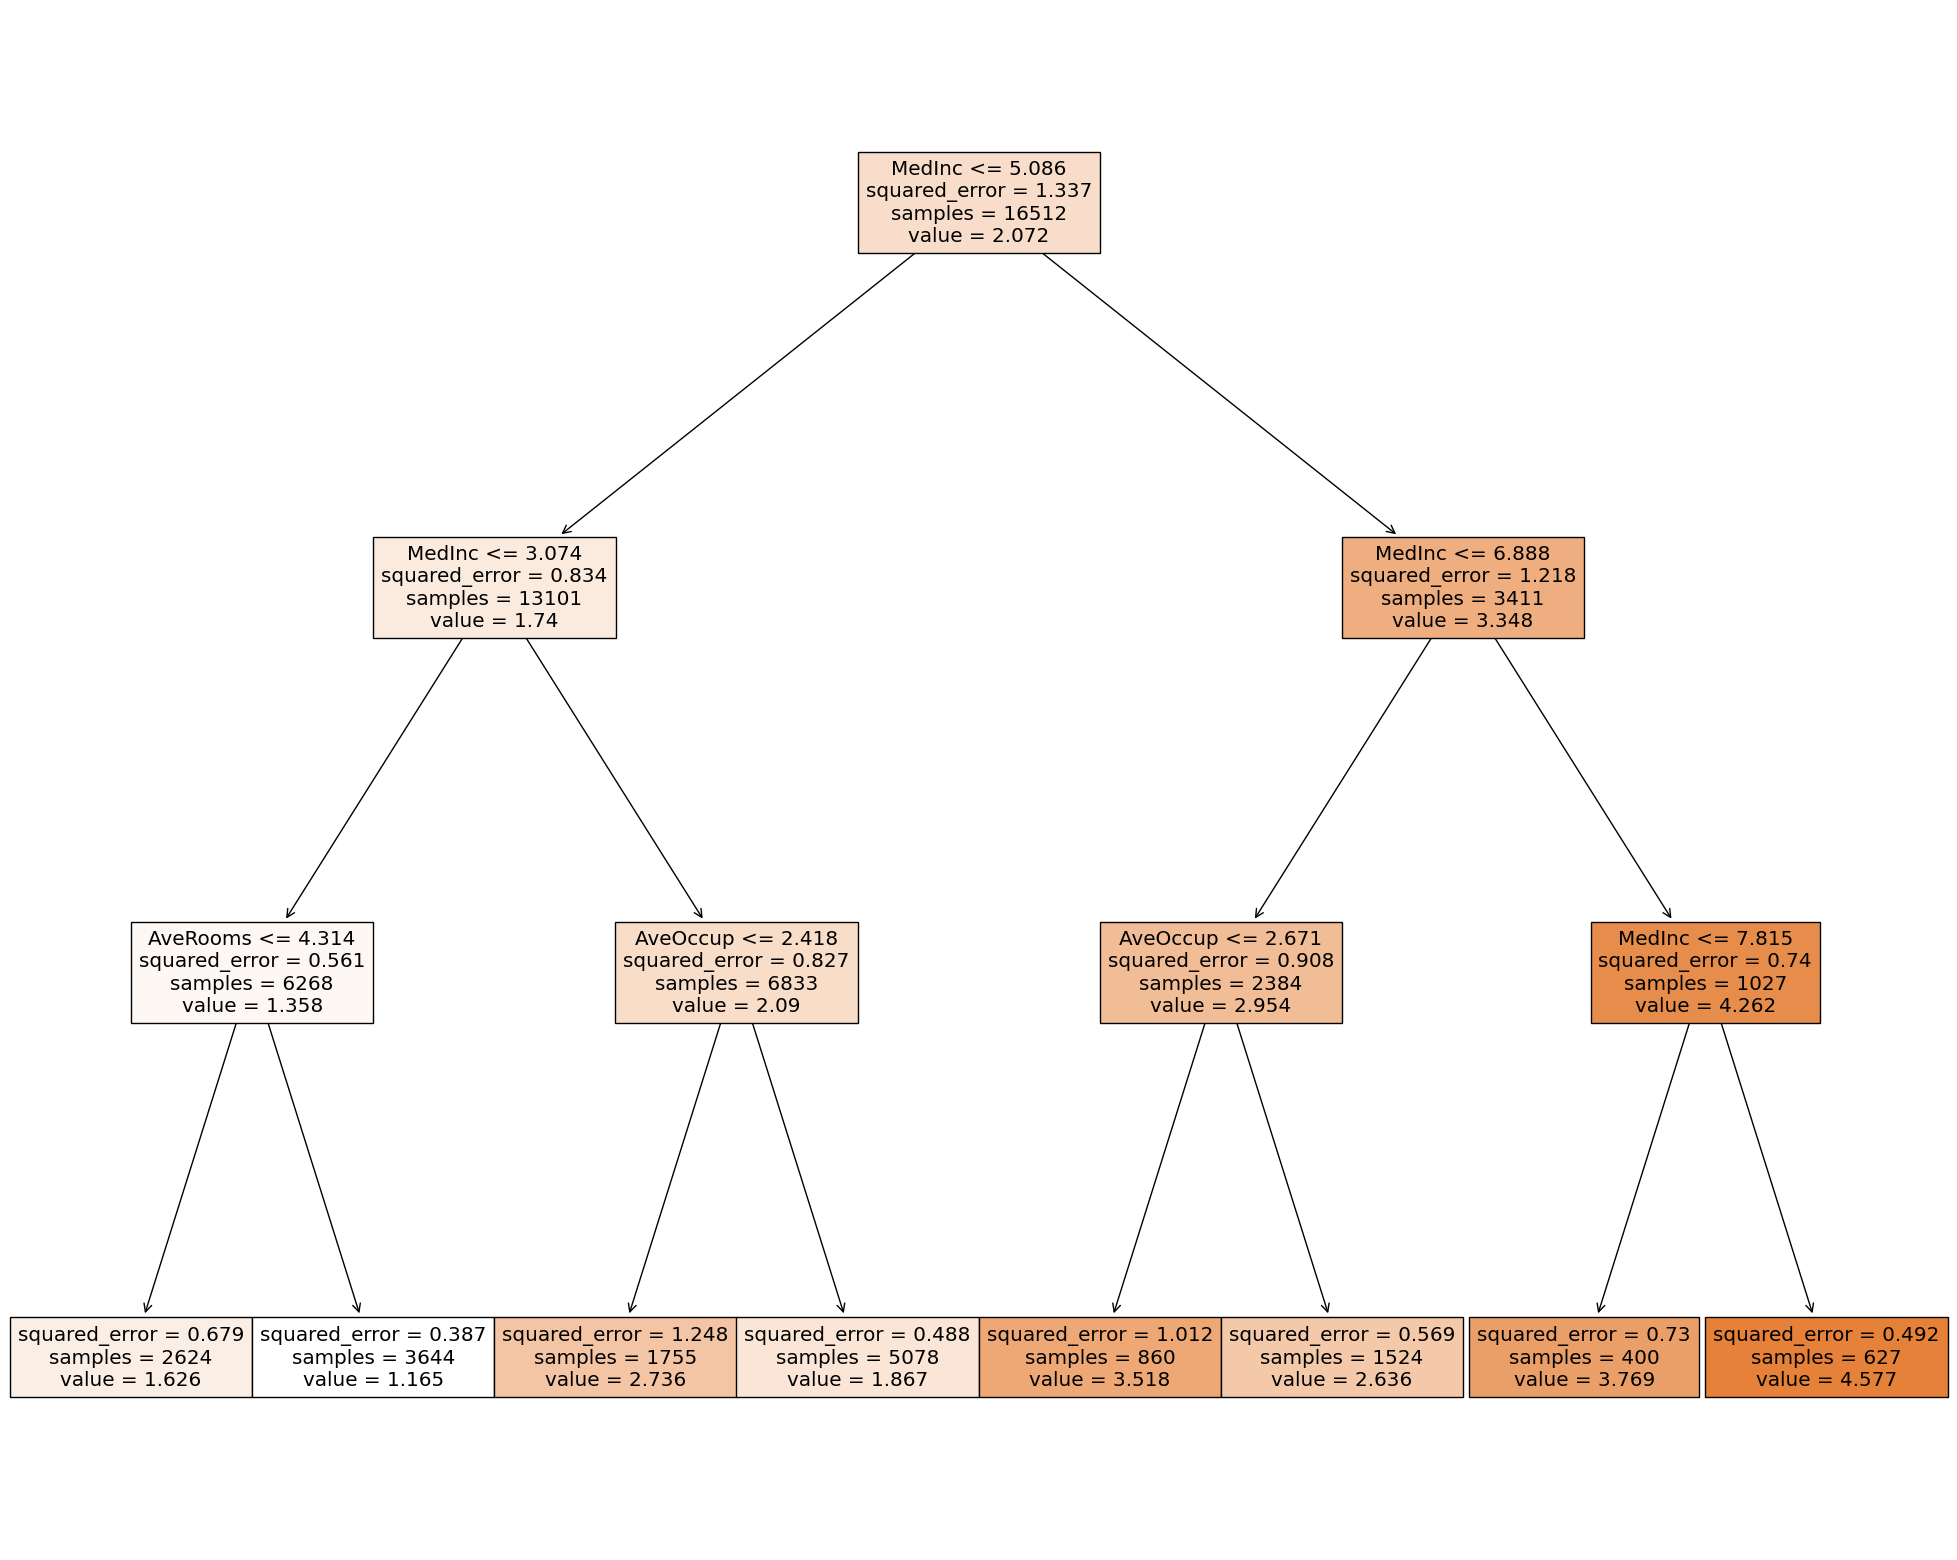

In [158]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, feature_names=california_housing.feature_names, filled=True)

In [75]:
# смотрим разницу факта и прогноза для дерева решений с глубиной равной 3
result_clf = pd.DataFrame([np.array(y_test), lr.predict(X_test)]).T
result_clf.columns = ['y_test', 'y_pred']
result_clf.head()

,y_test,y_pred
0,0.47700,0.719123
1,0.45800,1.764017
2,5.00001,2.709659
3,2.18600,2.838926
4,2.78000,2.604657


In [161]:
print(f'Метрика дерева решений с глубиной равной 3 = {clf.score(X_test, y_test)}')

Метрика дерева решений с глубиной равной 3 = 0.5097629887358219


In [167]:
#Поиском по сетке найдем оптимальную глубину дерева решений
dt_model = DecisionTreeRegressor()
param_grid = {'max_depth': list(range(1, 20))}
grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, scoring='r2', cv=5).fit(X_train, y_train)
print(f"Лучшая глубина = {grid_search.best_params_['max_depth']}")
print(f'Лучшее значение r2_score при этой глубине на тренировачной выборке =', grid_search.best_score_)

Лучшая глубина = 9
Лучшее значение r2_score при этой глубине на тренировачной выборке = 0.6995651972776296


In [168]:
#Переобучим модель с глубиной = 9
clf = DecisionTreeRegressor(max_depth=9)
model_clf = clf.fit(X_train, y_train)
# смотрим разницу факта и прогноза для дерева решений с глубиной равной 9
result_clf = pd.DataFrame([np.array(y_test), lr.predict(X_test)]).T
result_clf.columns = ['y_test', 'y_pred']
result_clf.head()

,y_test,y_pred
0,0.47700,0.719123
1,0.45800,1.764017
2,5.00001,2.709659
3,2.18600,2.838926
4,2.78000,2.604657


In [170]:
print(f'Метрика дерева решений с глубиной равной 9 на тестовой выборке = {clf.score(X_test, y_test)}')

Метрика дерева решений с глубиной равной 9 на тестовой выборке = 0.683335394037176


Модель дерева решений дала более высокую метрику, нежели линейная регрессии.
В свою очередь метрики для тестовой и тренировачной выборках примерно равны у модели дерева решений, что говорит нам о том, что модель обучилась корректно